In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
def find_optimal_k(df, features):
    k_values = range(1, 8)
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    sse = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        sse.append(kmeans.inertia_)

    plt.plot(k_values, sse, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method for K-means')
    plt.show()

    diffs = np.diff(sse)
    acceleration = diffs[1:] - diffs[:-1]
    optimal_k = np.argmax(acceleration) + 2
    print(f"Optimal k = {optimal_k}")
    return optimal_k

In [3]:
def scatter_plot(df,features):
    pca = PCA(n_components=3)
    X = df.copy()
    X = X.loc[:, features]
    principal_components = pca.fit_transform(X)

    # Step 3: Plot the reduced data points on a scatter plot with different colors for each cluster
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in df['Cluster'].unique():
        ax.scatter(principal_components[df['Cluster'] == cluster, 0],
                principal_components[df['Cluster'] == cluster, 1],
                principal_components[df['Cluster'] == cluster, 2],
                label=f'Cluster {cluster}')

    ax.set_title('3D Scatter Plot of Clusters after PCA')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend()
    plt.grid(True)
    plt.show()

In [4]:
def plot_counts(df):
    counts = df.groupby(['target_cluster', 'Cluster']).size().unstack(fill_value=0)

    counts.plot(kind='bar', stacked=True)
    plt.title('Cluster Distribution for Each Target')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Cluster')
    plt.show()

In [5]:
def kmeans_cluster_labels(df, features, n_clusters):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
    X_new = pd.DataFrame()
    X_new["Cluster"] = kmeans.fit_predict(X_scaled)
    return X_new

In [6]:
def gmm_cluster_labels(df, features, n_clusters):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    gmm = GaussianMixture(n_clusters)
    X_new = pd.DataFrame()
    X_new["Cluster"] = gmm.fit_predict(X_scaled)
    return X_new

In [7]:
def K_Means(df,features):
    opt_k = find_optimal_k(df, features)
    df_new = kmeans_cluster_labels(df, features, opt_k)
    df_cluster = pd.concat([df,df_new], axis=1)
    scatter_plot(df_cluster,features)
    plot_counts(df_cluster)
    return opt_k

In [8]:
def GMM(df,features,k):
    df_new = kmeans_cluster_labels(df, features, opt_k)
    df_cluster = pd.concat([df,df_new], axis=1)
    scatter_plot(df_cluster,features)
    plot_counts(df_cluster)

In [9]:
# initialize the data set we'll work with
training_data = fetch_california_housing()
df = pd.DataFrame(data= np.c_[training_data['data'], training_data['target']],
                     columns= training_data['feature_names'] + ['target'])
cluster_features = [
    'MedInc',
    'HouseAge',
    'AveRooms',
    'Population',
]

In [10]:
# plt.hist(df['target'],bins=50)
# plt.show()

In [11]:
df['target_cluster'] = df.apply(lambda row: int(row.target), axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,target_cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


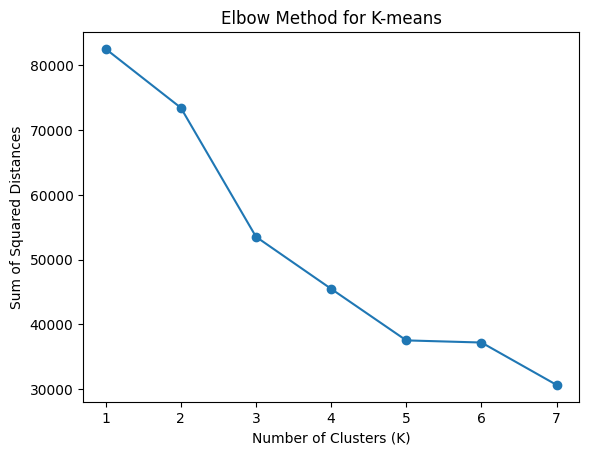

Optimal k = 3


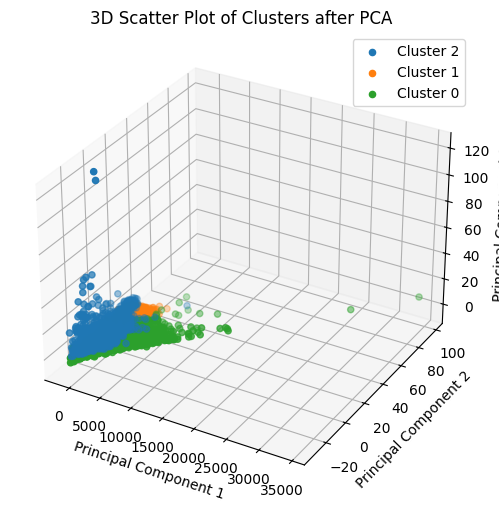

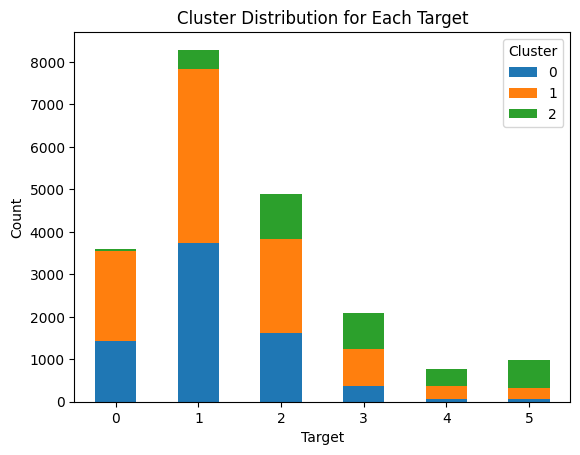

In [12]:
opt_k = K_Means(df,cluster_features)

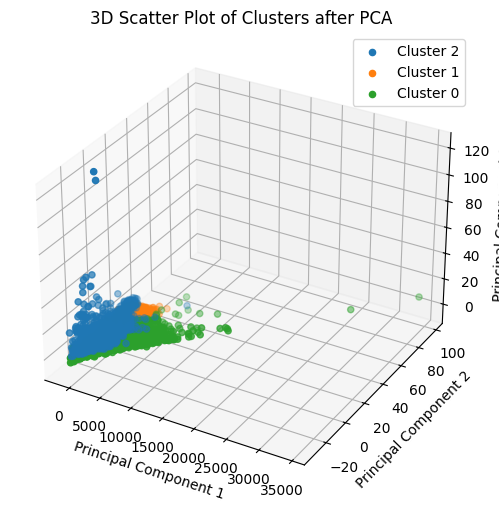

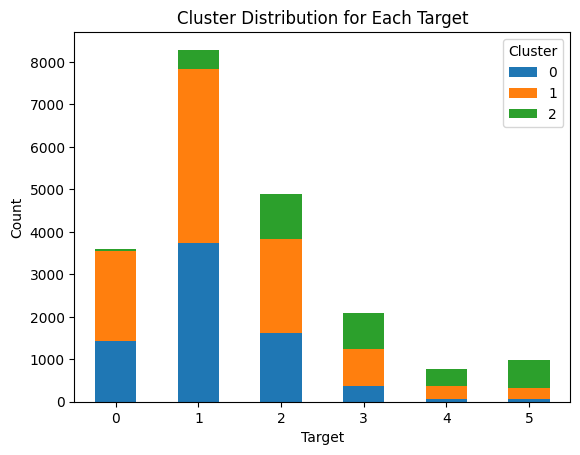

In [13]:
GMM(df,cluster_features,opt_k)